# 主成分分析

---
## 目的
主成分分析 (Principal Component Analysis; PCA) を用いてデータから潜在的な特徴を抽出する．

## 対応するチャプター
* 5.8: 主成分分析

## モジュールのインポート
プログラムの実行に必要なモジュールをインポートします．
実験にはPythonの機械学習用ライブラリである，scikit-learnを使用します．
使用するクラス，関数は以下の通りです．

* `PCA`はサポートベクトルマシンを使用するためのクラス
* `load_iris`はデータを読み込むための関数
* `matplotlib`はグラフを描画するためのPythonライブラリ

In [1]:
from sklearn.decomposition import PCA
from sklearn.datasets import load_iris
import matplotlib.pyplot as plt

## データセットの読み込み
実験に使用するデータセットを読み込みます．

今回はscikit-learnが提供する`load_iris`関数を用いて，データを読み込みます．
iris datasetはアヤメの品種データセットであり，アヤメの種類で3クラス，データ数は150のデータセットです．
各データはsepal length, sepal width, petal length, petal widthを表現した4次元のベクトルデータです．

読み込んだ全てのデータのうち，`iris_data.data`でデータを読み込み，`iris_data.target`で教師ラベルをそれぞれ読み込みます．

In [2]:
iris_data = load_iris()
x = iris_data.data
y = iris_data.target
print(x.shape)
print(y.shape)

(150, 4)
(150,)


## PCAの実行
読み込んだデータに対してPCAを実行します．

まず，`PCA`クラスを実行することでPCAを実行するための準備をします．

その後，`fit`関数を用いることでPCAを実行します．

In [3]:
# PCAの準備
pca = PCA()

# PCAの実行
pca.fit(x)

PCA(copy=True, iterated_power='auto', n_components=None, random_state=None,
  svd_solver='auto', tol=0.0, whiten=False)

## PCAで抽出した情報
PCAで抽出した，主成分を元にデータを変換します．

`fit_transform`関数を実行することで，抽出した主成分に対するデータの変換を行います．

In [4]:
transformed_x = pca.fit_transform(x)

## irisデータの可視化
irisデータの特徴をプロットして確認します．

### PCA適用前のデータの可視化
PCA適用前のデータをプロットします．
irisデータは4次元の特徴を持っているため，各次元のペアごとに2次元でプロットすることで可視化を行います．

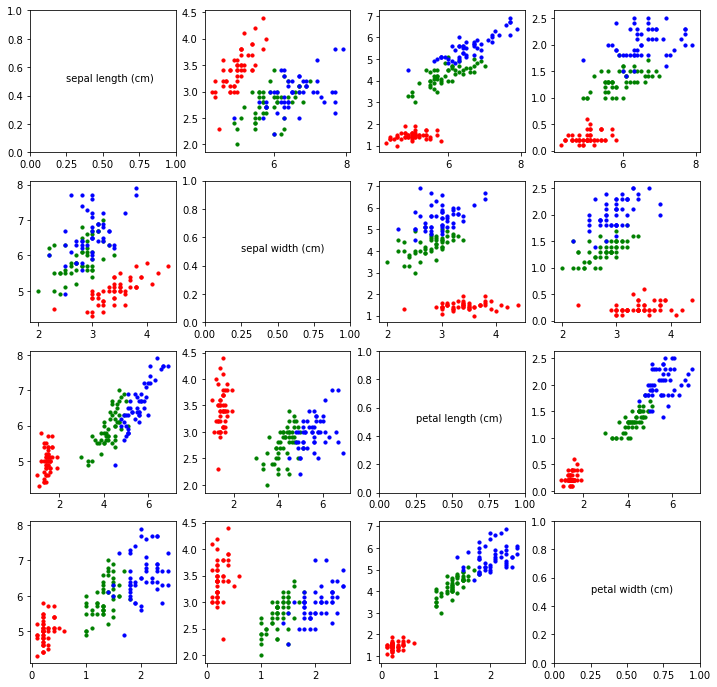

In [5]:
# 各特徴の名前を取得
feature_names = iris_data.feature_names

# アヤメの品種（クラス）ごとにデータを分割
class0 = x[y == 0, :]
class1 = x[y == 1, :]
class2 = x[y == 2, :]

fig = plt.figure(figsize=(12, 12))

for j in range(4):
    for i in range(4):
        ax = fig.add_subplot(4, 4, j * 4 + i + 1)
        
        if j == i:
            ax.text(0.25, 0.5, feature_names[i])
            continue
        
        ax.scatter(class0[:, j], class0[:, i], s=10, color='red')
        ax.scatter(class1[:, j], class1[:, i], s=10, color='green')
        ax.scatter(class2[:, j], class2[:, i], s=10, color='blue')

plt.show()
plt.close()

### PCA適用後のデータの可視化
次に，PCAによる変換したデータの可視化を行います．

第1主成分と第2主成分に対する特徴を用いて，2次元プロットを行います．

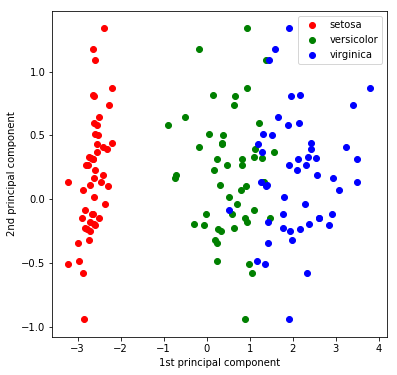

In [6]:
class_name = iris_data.target_names

# アヤメの品種（クラス）ごとにデータを分割し，
# 第１，第２主成分のみを取り出して保存
class0 = transformed_x[y == 0, 0:2]
class1 = transformed_x[y == 1, 0:2]
class2 = transformed_x[y == 2, 0:2]

# プロットします．
fig = plt.figure(figsize=(6, 6))
ax = fig.add_subplot(1, 1, 1)
ax.scatter(class0[:, 0], class0[:, 1], color='red', label=class_name[0])
ax.scatter(class1[:, 0], class0[:, 1], color='green', label=class_name[1])
ax.scatter(class2[:, 0], class0[:, 1], color='blue', label=class_name[2])
ax.set_xlabel("1st principal component")
ax.set_ylabel("2nd principal component")
ax.legend()
plt.show()
plt.close()